### This notebook is Lazy submission for the hackathon 

https://datahack.analyticsvidhya.com/contest/amexpert-2019-machine-learning-hackathon/

My public and private leaderboard scores are 0.5151261381 and 0.5080172286 respectively

In [1]:
from IPython.display import Image

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
train = pd.read_csv("data/train_AUpWtIz/train.csv")

In [5]:
customer_demographics = pd.read_csv("data/train_AUpWtIz/customer_demographics.csv")
campaign_data = pd.read_csv("data/train_AUpWtIz/campaign_data.csv")
coupon_item_mapping = pd.read_csv("data/train_AUpWtIz/coupon_item_mapping.csv")
customer_transaction_data = pd.read_csv("data/train_AUpWtIz/customer_transaction_data.csv")
item_data = pd.read_csv("data/train_AUpWtIz/item_data.csv")

In [6]:
test = pd.read_csv('data/test_QyjYwdj.csv')

In [7]:
train.shape

(78369, 5)

In [8]:
test.shape

(50226, 4)

In [9]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 976.0+ bytes


In [10]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [11]:
customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [12]:
campaign_data.campaign_type.value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

In [13]:
coupon_item_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB


In [14]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [15]:
item_data.category.unique()

array(['Grocery', 'Miscellaneous', 'Bakery', 'Pharmaceutical',
       'Packaged Meat', 'Seafood', 'Natural Products',
       'Dairy, Juices & Snacks', 'Prepared Food', 'Skin & Hair Care',
       'Meat', 'Travel', 'Flowers & Plants', 'Fuel', 'Salads', 'Alcohol',
       'Garden', 'Restauarant', 'Vegetables (cut)'], dtype=object)

In [16]:
item_data.brand_type.unique()

array(['Established', 'Local'], dtype=object)

In [17]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [18]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [19]:
customer_demographics.head(5)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [20]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [21]:
item_data.tail()

,item_id,brand,brand_type,category
74061,74062,5490,Established,Pharmaceutical
74062,74063,5497,Established,Pharmaceutical
74063,74064,5497,Established,Pharmaceutical
74064,74065,5520,Established,Pharmaceutical
74065,74066,5194,Established,Grocery


In [22]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [23]:
customer_transaction_data.customer_id.nunique()

1582

In [24]:
train.customer_id.nunique()

1428

In [25]:
test.customer_id.nunique()

1250

In [26]:
len(set(train.customer_id.unique())-set(test.customer_id.unique()))

332

In [27]:
len(set(test.customer_id.unique())-set(train.customer_id.unique()))

154

In [28]:
len(set(train.customer_id.unique())|set(test.customer_id.unique()))

1582

In [29]:
customer_transaction_data.customer_id.unique()

array([1501,  857,   67, ...,  405, 1569,  991])

### Each tablewise preprocessing

In [52]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [51]:
customer_demographics.describe(include='all')

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
count,760.000000,760,431,760.000000,760,222,760.000000
unique,NaN,6,2,NaN,5,3,NaN
top,NaN,46-55,Married,NaN,2,1,NaN
freq,NaN,271,317,NaN,303,107,NaN
mean,779.201316,NaN,NaN,0.053947,NaN,NaN,4.715789
std,459.754429,NaN,NaN,0.226063,NaN,NaN,2.258817
min,1.000000,NaN,NaN,0.000000,NaN,NaN,1.000000
25%,382.750000,NaN,NaN,0.000000,NaN,NaN,3.000000
50%,774.500000,NaN,NaN,0.000000,NaN,NaN,5.000000
75%,1187.250000,NaN,NaN,0.000000,NaN,NaN,6.000000


In [55]:
demographics = pd.concat([customer_demographics,pd.get_dummies(customer_demographics.age_range)],axis=1)

In [64]:
demographics = pd.concat([demographics,pd.get_dummies(demographics.no_of_children).rename(columns = {'1':'single_child','2':'two_children','3+':'more_than_two_children'})],axis=1)

In [65]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 16 columns):
customer_id               760 non-null int64
age_range                 760 non-null object
marital_status            431 non-null object
rented                    760 non-null int64
family_size               760 non-null object
no_of_children            222 non-null object
income_bracket            760 non-null int64
18-25                     760 non-null uint8
26-35                     760 non-null uint8
36-45                     760 non-null uint8
46-55                     760 non-null uint8
56-70                     760 non-null uint8
70+                       760 non-null uint8
single_child              760 non-null uint8
two_children              760 non-null uint8
more_than_two_children    760 non-null uint8
dtypes: int64(3), object(4), uint8(9)
memory usage: 48.3+ KB


In [66]:
demographics.marital_status.value_counts()

Married    317
Single     114
Name: marital_status, dtype: int64

In [74]:
demographics.family_size.value_counts()

2     303
1     248
3     104
5+     57
4      48
Name: family_size, dtype: int64

In [77]:
demographics.loc[demographics.family_size=='5+','5+_family_size']=1

In [80]:
demographics.loc[demographics.family_size=='5+','family_size']=5

In [82]:
demographics.family_size = demographics.family_size.astype(int)

In [71]:
demographics.rented = demographics.rented.astype(int)

In [83]:
demographics.drop(['age_range','marital_status','no_of_children'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 17 columns):
customer_id               760 non-null int64
rented                    760 non-null int64
family_size               760 non-null int64
income_bracket            760 non-null int64
18-25                     760 non-null uint8
26-35                     760 non-null uint8
36-45                     760 non-null uint8
46-55                     760 non-null uint8
56-70                     760 non-null uint8
70+                       760 non-null uint8
single_child              760 non-null uint8
two_children              760 non-null uint8
more_than_two_children    760 non-null uint8
Married                   760 non-null uint8
Single                    760 non-null uint8
5+_family_size            57 non-null float64
demographics              57 non-null float64
dtypes: float64(2), int64(4), uint8(11)
memory usage: 43.9 KB


In [86]:
demographics = demographics.drop(['age_range','marital_status','no_of_children'],axis=1)

In [87]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 16 columns):
customer_id               760 non-null int64
rented                    760 non-null int64
family_size               760 non-null int64
income_bracket            760 non-null int64
18-25                     760 non-null uint8
26-35                     760 non-null uint8
36-45                     760 non-null uint8
46-55                     760 non-null uint8
56-70                     760 non-null uint8
70+                       760 non-null uint8
single_child              760 non-null uint8
two_children              760 non-null uint8
more_than_two_children    760 non-null uint8
Married                   760 non-null uint8
Single                    760 non-null uint8
5+_family_size            57 non-null float64
dtypes: float64(1), int64(4), uint8(11)
memory usage: 37.9 KB


In [88]:
demographics.to_csv('Processed_demographics_data.csv',index=False)

In [89]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [90]:
item_data.describe(include='all')

,item_id,brand,brand_type,category
count,74066.000000,74066.000000,74066,74066
unique,NaN,NaN,2,19
top,NaN,NaN,Established,Grocery
freq,NaN,NaN,62842,32448
mean,37033.500000,1485.560055,NaN,NaN
std,21381.156856,1537.385673,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,18517.250000,278.000000,NaN,NaN
50%,37033.500000,978.000000,NaN,NaN
75%,55549.750000,2013.000000,NaN,NaN


In [118]:
item_data.item_id.nunique()

74066

In [101]:
item_data.brand.nunique()

5528

In [113]:
brand_data = item_data.groupby(['brand'],as_index=False).agg({
    'item_id':'count',
    'category':'nunique'
}).rename(columns= {'item_id':'item_count',
                    'category':'category_count'})

In [93]:
item_data.loc[item_data.brand_type=='Established','brand_type'] = 1

In [95]:
item_data.loc[item_data.brand_type=='Local','brand_type'] = 0

In [116]:
item_data = item_data.merge(brand_data,on='brand')

In [121]:
item_data = pd.concat([item_data,pd.get_dummies(item_data.category)],axis=1)

In [122]:
del item_data['category']

In [125]:
item_data.to_csv('processed_item_date.csv',index= False)

In [126]:
customer_transaction_data.describe(include='all')

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
count,1324566,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06
unique,549,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-09-03,NaN,NaN,NaN,NaN,NaN,NaN
freq,4753,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.040020e+02,2.951903e+04,1.306633e+02,1.146036e+02,-1.776871e+01,-5.948983e-01
std,NaN,4.573363e+02,1.790806e+04,1.311545e+03,1.529053e+02,3.788867e+01,7.069367e+00
min,NaN,1.000000e+00,1.000000e+00,1.000000e+00,3.600000e-01,-3.120310e+03,-1.992230e+03
25%,NaN,4.180000e+02,1.468400e+04,1.000000e+00,4.916000e+01,-2.315000e+01,0.000000e+00
50%,NaN,8.010000e+02,2.659700e+04,1.000000e+00,7.801000e+01,-1.780000e+00,0.000000e+00
75%,NaN,1.198000e+03,4.240575e+04,1.000000e+00,1.243100e+02,0.000000e+00,0.000000e+00


In [133]:
customer_transaction_data.item_id.nunique()

74063

In [134]:
customer_transaction_data.quantity.max()

89638

In [135]:
customer_transaction_data.quantity.min()

1

In [136]:
customer_transaction_data.selling_price.max()

17809.64

In [142]:
#customer_transaction_data['discount_price']
(customer_transaction_data.selling_price+customer_transaction_data.other_discount).max()

16028.64

In [144]:
#customer_transaction_data['discount_price']
(customer_transaction_data.selling_price+customer_transaction_data.other_discount).min()

-1424.44

In [145]:
#customer_transaction_data['discount_price']
customer_transaction_data[(customer_transaction_data.selling_price+customer_transaction_data.other_discount)==-1424.44]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
627988,2012-10-24,195,66406,1,712.4,-2136.84,0.0


In [165]:
customer_transaction_data.date = pd.to_datetime(customer_transaction_data.date)

In [167]:
item_based_customer_transaction = customer_transaction_data.groupby(['customer_id','item_id'],as_index=False).agg({
    'date':'max',
    'quantity':'sum',
    'selling_price':'sum',
    'other_discount':'mean',
    'coupon_discount':'mean'
})

In [168]:
item_based_customer_transaction.to_csv('item_based_customer_transaction.csv',index=False)

In [147]:
customer_transaction_data.item_id.value_counts()

49009    13540
34047     6308
13174     3879
45502     3292
29847     2276
18156     2226
28633     2152
32991     2101
9281      2007
8525      1922
6958      1883
53517     1755
5798      1747
13774     1630
45372     1627
45539     1526
30518     1507
57632     1500
53521     1500
32573     1463
27054     1409
21813     1340
10673     1323
30293     1309
19632     1304
14172     1247
28939     1181
57921     1178
30851     1172
25377     1169
         ...  
46619        1
42521        1
12809        1
44568        1
54807        1
52756        1
62995        1
58897        1
60944        1
1549         1
16902        1
12808        1
55829        1
47641        1
18950        1
31232        1
69167        1
73261        1
40477        1
38428        1
62992        1
1550         1
7693         1
9738         1
28163        1
26114        1
66094        1
35359        1
41498        1
2049         1
Name: item_id, Length: 74063, dtype: int64

In [150]:
customer_transaction_data[customer_transaction_data.coupon_discount!=0].shape

(21286, 7)

In [153]:
train.campaign_id.count()

78369

In [154]:
train.campaign_id.nunique()

18

In [143]:
pd.to_datetime(customer_transaction_data.date).min()

Timestamp('2012-01-02 00:00:00')

In [132]:
pd.to_datetime(campaign_data.end_date)

0    2013-12-20
1    2013-11-22
2    2013-11-16
3    2013-11-15
4    2013-10-18
5    2013-10-18
6    2013-04-10
7    2013-09-27
8    2013-08-30
9    2013-08-16
10   2013-05-07
11   2013-07-06
12   2013-05-24
13   2013-10-05
14   2013-12-04
15   2013-05-04
16   2013-08-03
17   2013-01-03
18   2013-02-16
19   2013-02-15
20   2013-08-02
21   2013-01-18
22   2013-01-18
23   2013-04-01
24   2012-11-30
25   2012-11-16
26   2012-10-27
27   2012-09-21
Name: end_date, dtype: datetime64[ns]

In [131]:
customer_transaction_data.customer_id.nunique()

1582

In [177]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74066 entries, 0 to 74065
Data columns (total 24 columns):
item_id                   74066 non-null int64
brand                     74066 non-null int64
brand_type                74066 non-null int64
item_count                74066 non-null int64
category_count            74066 non-null int64
Alcohol                   74066 non-null uint8
Bakery                    74066 non-null uint8
Dairy, Juices & Snacks    74066 non-null uint8
Flowers & Plants          74066 non-null uint8
Fuel                      74066 non-null uint8
Garden                    74066 non-null uint8
Grocery                   74066 non-null uint8
Meat                      74066 non-null uint8
Miscellaneous             74066 non-null uint8
Natural Products          74066 non-null uint8
Packaged Meat             74066 non-null uint8
Pharmaceutical            74066 non-null uint8
Prepared Food             74066 non-null uint8
Restauarant               74066 non-null uint

### Transformation, Merging and stuffs

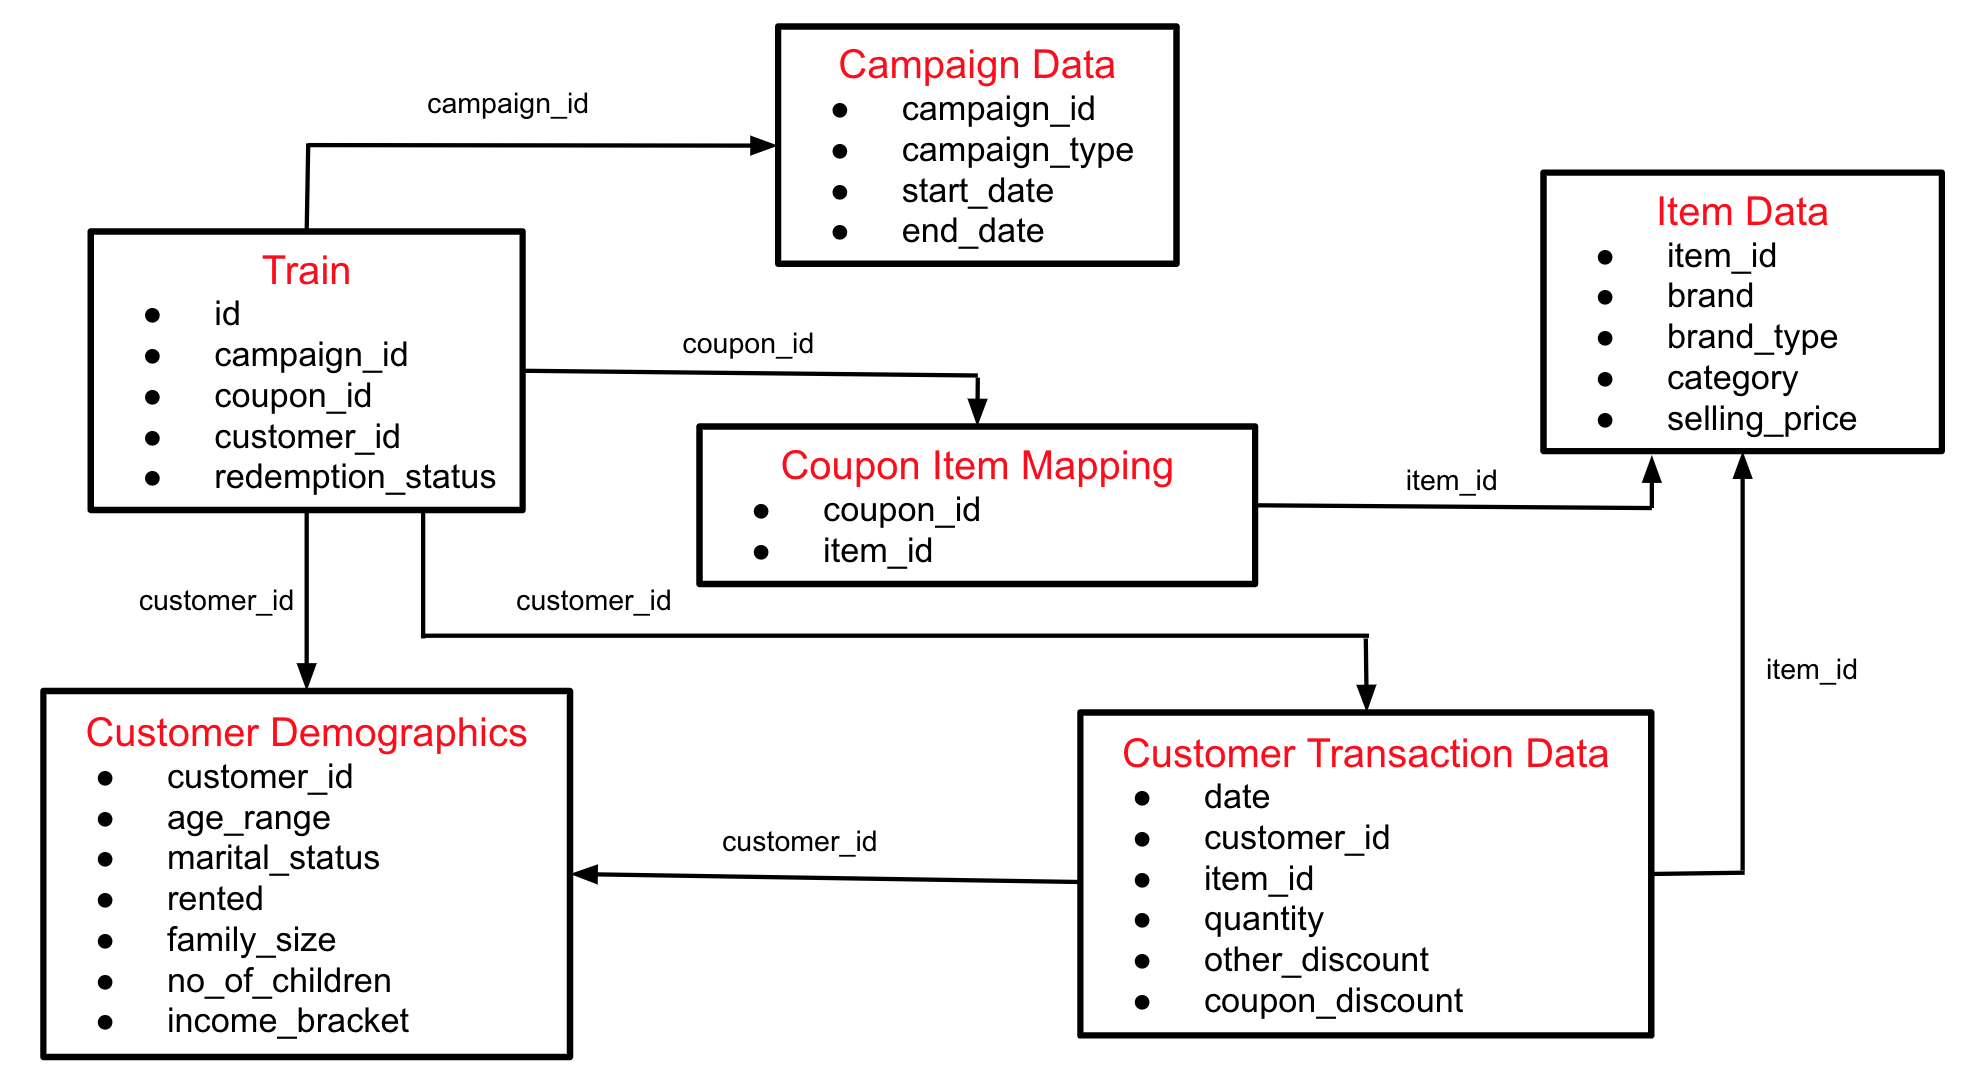

In [30]:
Image("Screenshot-2019-09-27-at-10.27.29-PM.png")

In [31]:
print("Shape and Customer Id unique count in customer_demographics: ",customer_demographics.shape,", ",customer_demographics.customer_id.nunique())
print("Shape and Customer Id unique count in customer_transaction_data: ",customer_transaction_data.shape,", ",customer_transaction_data.customer_id.nunique())
print("Shape and Customer Id unique count in train: ",train.shape,", ",train.customer_id.nunique())
print("Shape and Customer Id unique count in test: ",test.shape,", ",test.customer_id.nunique())


Shape and Customer Id unique count in customer_demographics:  (760, 7) ,  760
Shape and Customer Id unique count in customer_transaction_data:  (1324566, 7) ,  1582
Shape and Customer Id unique count in train:  (78369, 5) ,  1428
Shape and Customer Id unique count in test:  (50226, 4) ,  1250


In [33]:
train.redemption_status.value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [35]:
train_data = train.merge(campaign_data,on='campaign_id')

In [178]:
item_transactions = item_based_customer_transaction.merge(item_data,on=['item_id'])

In [179]:
train.merge(coupon_item_mapping, on='coupon_id')

,id,campaign_id,coupon_id,customer_id,redemption_status,item_id
0,1,13,27,1053,0,24775
1,1,13,27,1053,0,14958
2,1,13,27,1053,0,40431
3,1,13,27,1053,0,20749
4,1,13,27,1053,0,56860
5,1,13,27,1053,0,58066
6,1,13,27,1053,0,56921
7,1,13,27,1053,0,56955
8,1,13,27,1053,0,58068
9,1,13,27,1053,0,56907


In [155]:
#coupon_item = coupon_item_mapping.merge(item_transactions,on='item_id',how='left')

In [156]:
coupon_item.coupon_id.nunique()

1116

In [157]:
coupon_item.shape

(92663, 25)

In [159]:
coupon_item.head()

,coupon_id,item_id,brand,brand_type,item_count,category_count,Alcohol,Bakery,"Dairy, Juices & Snacks",Flowers & Plants,...,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Restauarant,Salads,Seafood,Skin & Hair Care,Travel,Vegetables (cut)
0,105,37,56,0,10480,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107,75,56,0,10480,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,494,76,209,1,295,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,522,77,278,1,547,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,518,77,278,1,547,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train_data.coupon_id.nunique()

866

In [47]:
len(set(coupon_item.coupon_id.unique()) - set(train_data.coupon_id.unique()))

250

In [171]:
coupon_item_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB


In [174]:
train_data.merge(coupon_item_mapping,on='coupon_id').shape

(6420694, 9)

In [169]:
item_based_customer_transaction.merge(coupon_item,on=['item_id']).shape

(1220885, 31)

In [170]:
item_based_customer_transaction.shape

(787687, 7)

In [33]:
def merge_on_ids(data):
    data = data.merge(customer_demographics,on='customer_id',how='left')
    data = data.merge(coupon_item_mapping,on='coupon_id',how='left')
    data = data.merge(item_data,on='item_id',how='left')
    data = data.merge(campaign_data,on='campaign_id',how='left')
    return data

In [34]:
train_data = train.copy()

In [35]:
train_data = merge_on_ids(train_data)

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420694 entries, 0 to 6420693
Data columns (total 18 columns):
id                   int64
campaign_id          int64
coupon_id            int64
customer_id          int64
redemption_status    int64
age_range            object
marital_status       object
rented               float64
family_size          object
no_of_children       object
income_bracket       float64
item_id              int64
brand                int64
brand_type           object
category             object
campaign_type        object
start_date           object
end_date             object
dtypes: float64(2), int64(7), object(9)
memory usage: 930.7+ MB
